# Feature Engineering

In this notebook we will extract features using deep learning method called Convultional autoencoder.

The input and the output to this method will be the galaxy images

---

let us call the data from the prevoius notebook

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import numpy as np

---

### call the data

In [35]:
from data_import.galaxy_mnist import GalaxyMNISTHighrez
dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default, or False for canonical test set
)

In [36]:
images_train = dataset_train.data
images_test = dataset_test.data



In [37]:
labels_train = dataset_train.targets
labels_test = dataset_test.targets

In [38]:
class0 = np.where (np.array(labels_train) == 0 )
class1 = np.where (np.array(labels_train) == 1 )
class2 = np.where (np.array(labels_train) == 2 )
class3 = np.where (np.array(labels_train) == 3 )

In [39]:
labels_test

tensor([3, 2, 1,  ..., 0, 1, 1])

### pre-processing 

In [40]:
from source.pre import pre_processing

In [41]:
images_trainPre = pre_processing(images_train, 56)
images_testPre = pre_processing(images_test, 56)

8000
2000


In [42]:
images_trainPre.shape

(8000, 56, 56)

#### The images after pre-processing

label: smooth_round
(56, 56)


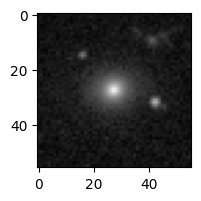

label: smooth_cigar
(56, 56)


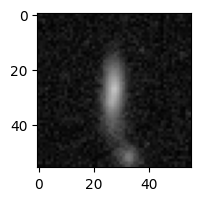

label: edge_on_disk
(56, 56)


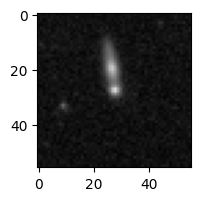

label: unbarred_spiral
(56, 56)


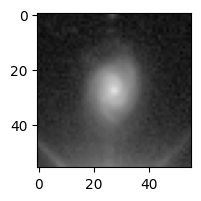

In [43]:
for classArr in [class0, class1, class2, class3]:
    train_image, train_label = dataset_train[classArr[0][0]]

    plt.figure(figsize=(2, 2))
    train_image = images_trainPre[classArr[0][0]]*255
    print("label: "+str(GalaxyMNISTHighrez.classes[train_label]))
    print(train_image.shape)
    plt.imshow(train_image,cmap='gray', vmin=0, vmax=255 )
    plt.show() 

---

## Shallow Autoencoder

Now we will train the autoencoder nural network on the data that we pre-processed. The original code can be found [here](https://www.tensorflow.org/tutorials/generative/autoencoder).

In [48]:
latent_dim = 64 

# need to document how excatly it works

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(56*56, activation='sigmoid'),
      layers.Reshape((56, 56))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

shallow_model = Autoencoder(latent_dim)

In [49]:
shallow_model.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [50]:
shallow_model.fit(np.array(images_trainPre), np.array(images_trainPre),
                epochs=50,
                shuffle=True,
                validation_data=(np.array(images_testPre), np.array(images_testPre)))

Epoch 1/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0137 - val_loss: 0.0057
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 3/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0032

You can notice that runing this code is quite fast, this is becuase the model is too shallow.

In [51]:
shallow_model.save("/users/hussein/work/galaxy-cluster/shallowModel_save") # saving the model


INFO:tensorflow:Assets written to: /users/hussein/work/galaxy-cluster/shallowModel_save/assets


INFO:tensorflow:Assets written to: /users/hussein/work/galaxy-cluster/shallowModel_save/assets


In [52]:
encoded_imgs = autoencoder.encoder(images_testPre).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [53]:
print(decoded_imgs.shape)

(2000, 56, 56)


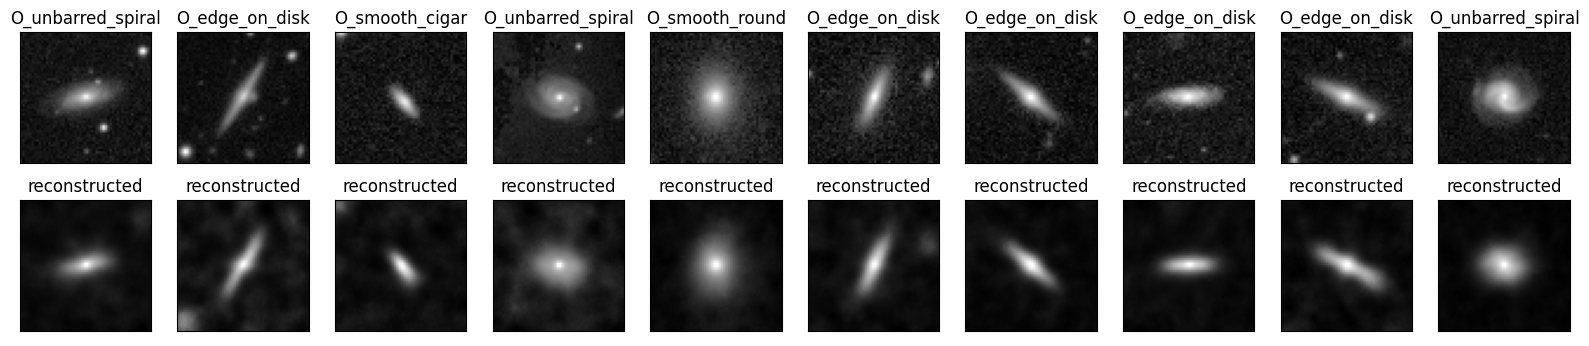

In [54]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(images_testPre[i])
  plt.title("O_"+str(GalaxyMNISTHighrez.classes[np.array(labels_test[i])] ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

-EX: What do you think in the images above, do you think its good enough to perofrm clustring or classifiction later on, also how would you compare the image before and after the construction.

- Note, for the extracted features, I have tried to remove all zeros, but the output was diffrint for both the training and the testing, which is weried.
- Also, I need to save the model so we can actually exctract the features from the encoder.
- add early stopping as an exrcise, also to graph the score (may be I should do that) 

---

### Deep autoencoder

Now let us try a more complicated model and notice the diffrince, time and image quality

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers

class GalaxyEncoder(Model):
    def __init__(self):
∂          layers.Conv2DTranspose(16, (3,3), 1, padding="same", activation="relu"),
            layers.Conv2D(1, (3,3), 1, padding="same", activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [26]:
# from source.galaxyencode import GalaxyEncoder

In [27]:
model = GalaxyEncoder()

In [28]:
model.compile(optimizer='sgd', loss='mse')


In [29]:
model.build((None, 56,56,1))
model.summary()

Model: "galaxy_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 1568)              1320      
                                                                 
 sequential_5 (Sequential)   (None, 56, 56, 1)         1897      
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(np.array(images_trainPre), np.array(images_trainPre),
                epochs=100,
                shuffle=True,
                validation_data=(np.array(images_testPre), np.array(images_testPre)))

Epoch 1/100
250/250 [==============================] - 29s 115ms/step - loss: 0.0409 - val_loss: 0.0178
Epoch 2/100
250/250 [==============================] - 29s 114ms/step - loss: 0.0171 - val_loss: 0.0171
Epoch 3/100
250/250 [==============================] - 29s 114ms/step - loss: 0.0165 - val_loss: 0.0164
Epoch 4/100
250/250 [==============================] - 29s 115ms/step - loss: 0.0158 - val_loss: 0.0156
Epoch 5/100
250/250 [==============================] - 29s 115ms/step - loss: 0.0149 - val_loss: 0.0147
Epoch 6/100
250/250 [==============================] - 29s 115ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 7/100
250/250 [==============================] - 29s 114ms/step - loss: 0.0129 - val_loss: 0.0126
Epoch 8/100
250/250 [==============================] - 29s 114ms/step - loss: 0.0119 - val_loss: 0.0115
Epoch 9/100
250/250 [==============================] - 29s 114ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 10/100
250/250 [==============================] - 29s 114m

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



250/250 [==============================] - 29s 115ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 98/100
250/250 [==============================] - 29s 115ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 99/100
250/250 [==============================] - 29s 118ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 100/100
250/250 [==============================] - 29s 116ms/step - loss: 0.0025 - val_loss: 0.0025


Ex: Save the model

In [31]:
encoded_imgs = model.encoder(images_testPre).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

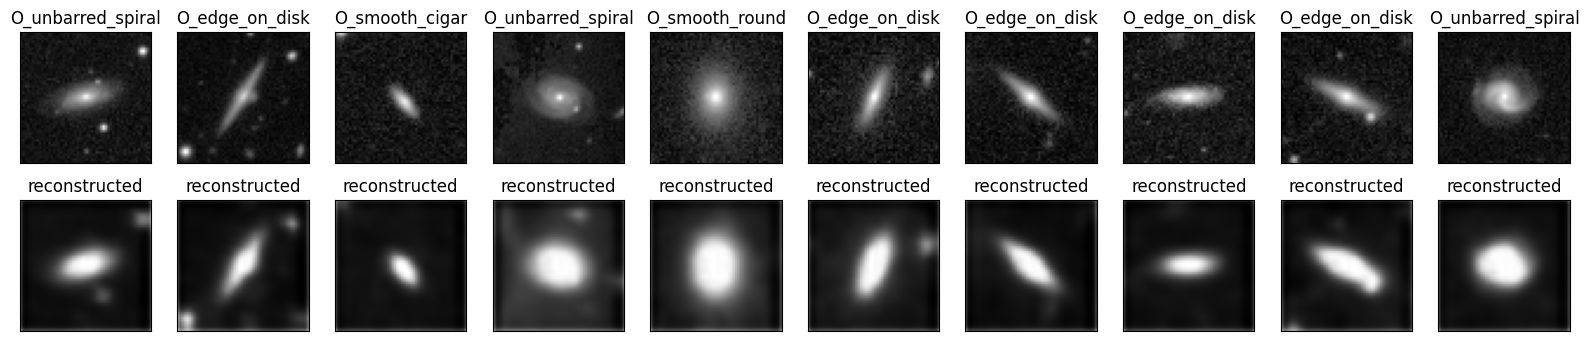

In [32]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(images_testPre[i])
  plt.title("O_"+str(GalaxyMNISTHighrez.classes[np.array(labels_test[i])] ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Re-train the autoencoder and this time measure the time complixity of the model (let us know how much do the model take to train, and also how does it compare to the shallow autoencoder)

I think including the time in thier analysis will be very good.

---

#### **_Saving data for later use_**

We can save the data so that we can call it up again in subsequent notebooks

In [56]:
%store images_trainPre
%store images_testPre
%store labels_train
%store labels_test

Stored 'images_trainPre' (ndarray)
Stored 'images_testPre' (ndarray)
Stored 'labels_train' (Tensor)
Stored 'labels_test' (Tensor)
